## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Setting up working directory

In [2]:
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/CDS/superconduct/

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\superconduct


## Reading the csv file

In [3]:
data = pd.read_csv('train.csv')

## Summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

## Filtering the data

#### We will use only the weighted columns

In [5]:
filter_col = [col for col in data if col.startswith('w')]
df = data[filter_col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wtd_mean_atomic_mass             21263 non-null  float64
 1   wtd_gmean_atomic_mass            21263 non-null  float64
 2   wtd_entropy_atomic_mass          21263 non-null  float64
 3   wtd_range_atomic_mass            21263 non-null  float64
 4   wtd_std_atomic_mass              21263 non-null  float64
 5   wtd_mean_fie                     21263 non-null  float64
 6   wtd_gmean_fie                    21263 non-null  float64
 7   wtd_entropy_fie                  21263 non-null  float64
 8   wtd_range_fie                    21263 non-null  float64
 9   wtd_std_fie                      21263 non-null  float64
 10  wtd_mean_atomic_radius           21263 non-null  float64
 11  wtd_gmean_atomic_radius          21263 non-null  float64
 12  wtd_entropy_atomic

## Counting NA values per column

In [6]:
df.isna().sum()

wtd_mean_atomic_mass               0
wtd_gmean_atomic_mass              0
wtd_entropy_atomic_mass            0
wtd_range_atomic_mass              0
wtd_std_atomic_mass                0
wtd_mean_fie                       0
wtd_gmean_fie                      0
wtd_entropy_fie                    0
wtd_range_fie                      0
wtd_std_fie                        0
wtd_mean_atomic_radius             0
wtd_gmean_atomic_radius            0
wtd_entropy_atomic_radius          0
wtd_range_atomic_radius            0
wtd_std_atomic_radius              0
wtd_mean_Density                   0
wtd_gmean_Density                  0
wtd_entropy_Density                0
wtd_range_Density                  0
wtd_std_Density                    0
wtd_mean_ElectronAffinity          0
wtd_gmean_ElectronAffinity         0
wtd_entropy_ElectronAffinity       0
wtd_range_ElectronAffinity         0
wtd_std_ElectronAffinity           0
wtd_mean_FusionHeat                0
wtd_gmean_FusionHeat               0
w

## Cheaking the correlation between each columns in the data frame

##### (Using heat map to check visually)

Text(0.5, 1.0, 'Correlations')

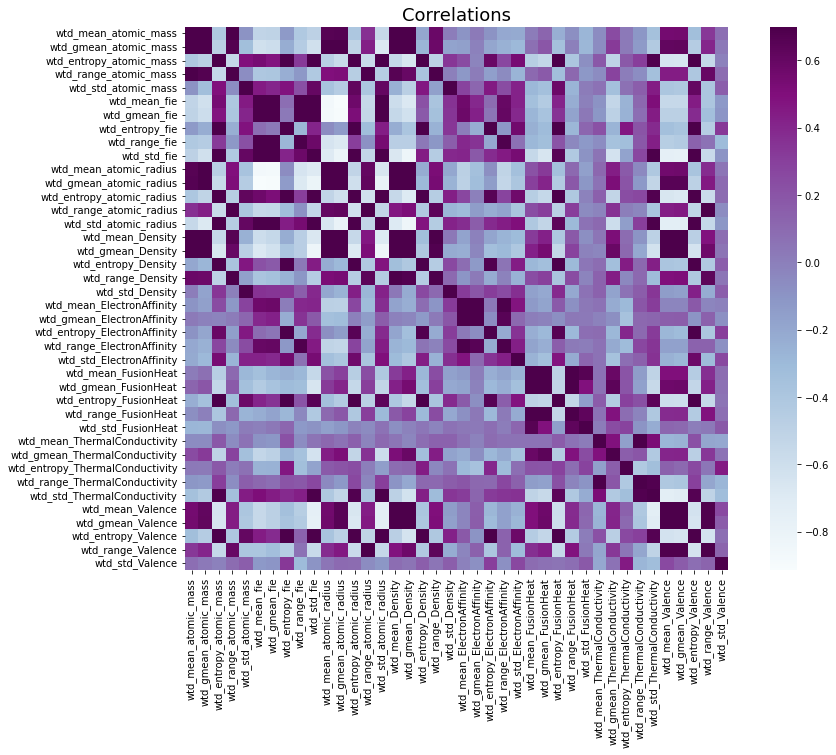

In [7]:
corr = df.corr() # calculationg the correlation dataframe
plt.subplots(figsize=(15,10)) # figure size 
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True) # for plotting the heat map [add annot=True in side () to see the numerical values]
ax.set_title("Correlations", fontsize = 18)

## Cheaking multicollinearity using VIF (Variance Inflation Factor)

##### Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression.

##### A rule of thumb for interpreting the variance inflation factor:

##### 1 = not correlated.
##### Between 1 and 5 = moderately correlated.
##### Greater than 5 = highly correlated.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{df.columns[i]: variance_inflation_factor(df.values, i) for i in range(1, df.shape[1])}

{'wtd_gmean_atomic_mass': 902.8496705725279,
 'wtd_entropy_atomic_mass': 634.4497988095854,
 'wtd_range_atomic_mass': 45.04433831706211,
 'wtd_std_atomic_mass': 78.69732882882464,
 'wtd_mean_fie': 102356.30749043249,
 'wtd_gmean_fie': 92320.17602193289,
 'wtd_entropy_fie': 617.710028517159,
 'wtd_range_fie': 184.774230802792,
 'wtd_std_fie': 400.26844143198593,
 'wtd_mean_atomic_radius': 17866.423256801103,
 'wtd_gmean_atomic_radius': 14799.360104517857,
 'wtd_entropy_atomic_radius': 1120.0735500722842,
 'wtd_range_atomic_radius': 44.444574171285495,
 'wtd_std_atomic_radius': 237.77270633400974,
 'wtd_mean_Density': 412.8476979112092,
 'wtd_gmean_Density': 212.46924415117138,
 'wtd_entropy_Density': 153.81603700748235,
 'wtd_range_Density': 39.538831878585846,
 'wtd_std_Density': 33.73796973233668,
 'wtd_mean_ElectronAffinity': 600.9028672914558,
 'wtd_gmean_ElectronAffinity': 310.00002136543236,
 'wtd_entropy_ElectronAffinity': 112.61531474184275,
 'wtd_range_ElectronAffinity': 77.500

In [8]:
# Copying the dataset
df_c = pd.DataFrame(df.copy())

## Creating a function that delete highly correlated columns

In [9]:
def correlation_select(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.info())

## Using the function to remove highly correlated columns

In [10]:
correlation_select(df_c,0.6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   wtd_mean_atomic_mass             21263 non-null  float64
 1   wtd_entropy_atomic_mass          21263 non-null  float64
 2   wtd_std_atomic_mass              21263 non-null  float64
 3   wtd_mean_fie                     21263 non-null  float64
 4   wtd_range_atomic_radius          21263 non-null  float64
 5   wtd_mean_ElectronAffinity        21263 non-null  float64
 6   wtd_entropy_ElectronAffinity     21263 non-null  float64
 7   wtd_std_ElectronAffinity         21263 non-null  float64
 8   wtd_mean_FusionHeat              21263 non-null  float64
 9   wtd_mean_ThermalConductivity     21263 non-null  float64
 10  wtd_gmean_ThermalConductivity    21263 non-null  float64
 11  wtd_entropy_ThermalConductivity  21263 non-null  float64
 12  wtd_mean_Valence  

In [11]:
#Selected columns as features
df_c.columns

Index(['wtd_mean_atomic_mass', 'wtd_entropy_atomic_mass',
       'wtd_std_atomic_mass', 'wtd_mean_fie', 'wtd_range_atomic_radius',
       'wtd_mean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'wtd_mean_FusionHeat',
       'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_mean_Valence',
       'wtd_std_Valence'],
      dtype='object')

## Data Preprocessing

In [12]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df_c)
scaled_y = sy.fit_transform(data['critical_temp'].values.reshape(data.shape[0],1)) # we can use .values.reshape(-1, 1) also

In [14]:
scaled_y.ndim

2

## Subsetting the dataframe into feature and label

In [15]:
X = np.array(scaled_x, copy=True)

y = np.reshape(scaled_y,-1) # Reducing scaled_y's dimention to 1

## Spliting the dataset into training and testing

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

## Implementing OLS

In [31]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              5043.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                        0.00
Time:                        13:40:54   Log-Likelihood:                          11841.
No. Observations:               14884   AIC:                                 -2.365e+04
Df Residuals:                   14870   BIC:                                 -2.355e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Implementing Gradient Descent

In [136]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
  

## Batch Gradient Descent

X_train:(14884, 14)
y_train:(14884,)
Iteration: 0, Cost: 1224.843
Iteration: 1, Cost: 1186.715
Iteration: 2, Cost: 1151.015
Iteration: 3, Cost: 1117.543
Iteration: 4, Cost: 1086.117
Iteration: 5, Cost: 1056.569
Iteration: 6, Cost: 1028.750
Iteration: 7, Cost: 1002.520
Iteration: 8, Cost: 977.756
Iteration: 9, Cost: 954.341
Iteration: 10, Cost: 932.171
Iteration: 11, Cost: 911.152
Iteration: 12, Cost: 891.196
Iteration: 13, Cost: 872.224
Iteration: 14, Cost: 854.163
Iteration: 15, Cost: 836.947
Iteration: 16, Cost: 820.516
Iteration: 17, Cost: 804.814
Iteration: 18, Cost: 789.791
Iteration: 19, Cost: 775.400
Iteration: 20, Cost: 761.599
Iteration: 21, Cost: 748.349
Iteration: 22, Cost: 735.614
Iteration: 23, Cost: 723.363
Iteration: 24, Cost: 711.564
Iteration: 25, Cost: 700.190
Iteration: 26, Cost: 689.217
Iteration: 27, Cost: 678.620
Iteration: 28, Cost: 668.378
Iteration: 29, Cost: 658.471
Iteration: 30, Cost: 648.882
Iteration: 31, Cost: 639.593
Iteration: 32, Cost: 630.589
Iteratio

Iteration: 401, Cost: 226.325
Iteration: 402, Cost: 226.276
Iteration: 403, Cost: 226.227
Iteration: 404, Cost: 226.178
Iteration: 405, Cost: 226.130
Iteration: 406, Cost: 226.082
Iteration: 407, Cost: 226.034
Iteration: 408, Cost: 225.986
Iteration: 409, Cost: 225.939
Iteration: 410, Cost: 225.891
Iteration: 411, Cost: 225.844
Iteration: 412, Cost: 225.797
Iteration: 413, Cost: 225.750
Iteration: 414, Cost: 225.704
Iteration: 415, Cost: 225.657
Iteration: 416, Cost: 225.611
Iteration: 417, Cost: 225.565
Iteration: 418, Cost: 225.519
Iteration: 419, Cost: 225.474
Iteration: 420, Cost: 225.428
Iteration: 421, Cost: 225.383
Iteration: 422, Cost: 225.338
Iteration: 423, Cost: 225.293
Iteration: 424, Cost: 225.248
Iteration: 425, Cost: 225.204
Iteration: 426, Cost: 225.159
Iteration: 427, Cost: 225.115
Iteration: 428, Cost: 225.071
Iteration: 429, Cost: 225.027
Iteration: 430, Cost: 224.984
Iteration: 431, Cost: 224.940
Iteration: 432, Cost: 224.897
Iteration: 433, Cost: 224.853
Iteration:

Iteration: 874, Cost: 214.139
Iteration: 875, Cost: 214.125
Iteration: 876, Cost: 214.112
Iteration: 877, Cost: 214.099
Iteration: 878, Cost: 214.086
Iteration: 879, Cost: 214.072
Iteration: 880, Cost: 214.059
Iteration: 881, Cost: 214.046
Iteration: 882, Cost: 214.033
Iteration: 883, Cost: 214.020
Iteration: 884, Cost: 214.007
Iteration: 885, Cost: 213.994
Iteration: 886, Cost: 213.981
Iteration: 887, Cost: 213.968
Iteration: 888, Cost: 213.955
Iteration: 889, Cost: 213.942
Iteration: 890, Cost: 213.929
Iteration: 891, Cost: 213.916
Iteration: 892, Cost: 213.904
Iteration: 893, Cost: 213.891
Iteration: 894, Cost: 213.878
Iteration: 895, Cost: 213.865
Iteration: 896, Cost: 213.853
Iteration: 897, Cost: 213.840
Iteration: 898, Cost: 213.828
Iteration: 899, Cost: 213.815
Iteration: 900, Cost: 213.802
Iteration: 901, Cost: 213.790
Iteration: 902, Cost: 213.777
Iteration: 903, Cost: 213.765
Iteration: 904, Cost: 213.752
Iteration: 905, Cost: 213.740
Iteration: 906, Cost: 213.728
Iteration:

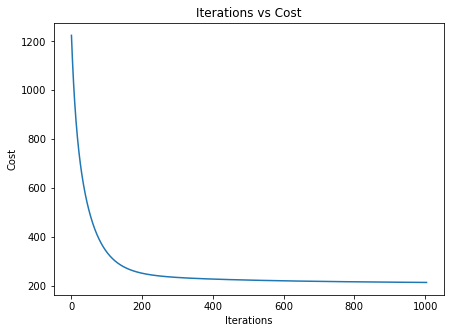

In [137]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=True)
batch_regressor.fit(X_train_ns,y_train_ns)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

## Sequential Gradient Descent

X_train:(14884, 14)
y_train:(14884,)
Iteration: 0, Cost: 2.818
Iteration: 1, Cost: 2.730
Iteration: 2, Cost: 2.645
Iteration: 3, Cost: 2.565
Iteration: 4, Cost: 2.488
Iteration: 5, Cost: 2.415
Iteration: 6, Cost: 2.345
Iteration: 7, Cost: 2.278
Iteration: 8, Cost: 2.214
Iteration: 9, Cost: 2.152
Iteration: 10, Cost: 2.094
Iteration: 11, Cost: 2.037
Iteration: 12, Cost: 1.983
Iteration: 13, Cost: 1.931
Iteration: 14, Cost: 1.881
Iteration: 15, Cost: 1.833
Iteration: 16, Cost: 1.787
Iteration: 17, Cost: 1.742
Iteration: 18, Cost: 1.699
Iteration: 19, Cost: 1.658
Iteration: 20, Cost: 1.618
Iteration: 21, Cost: 1.579
Iteration: 22, Cost: 1.542
Iteration: 23, Cost: 1.506
Iteration: 24, Cost: 1.471
Iteration: 25, Cost: 1.437
Iteration: 26, Cost: 1.404
Iteration: 27, Cost: 1.372
Iteration: 28, Cost: 1.342
Iteration: 29, Cost: 1.312
Iteration: 30, Cost: 1.283
Iteration: 31, Cost: 1.255
Iteration: 32, Cost: 1.228
Iteration: 33, Cost: 1.202
Iteration: 34, Cost: 1.176
Iteration: 35, Cost: 1.151
I

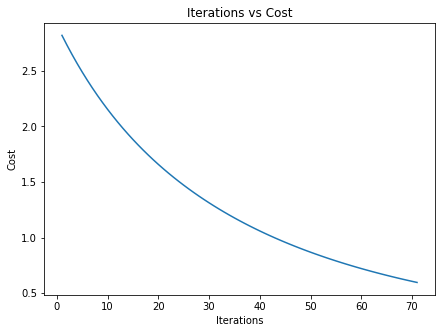

In [138]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(y_train,seq_regressor.predict(X_train))
test_score = r2_score(y_test,seq_regressor.predict(X_test))

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

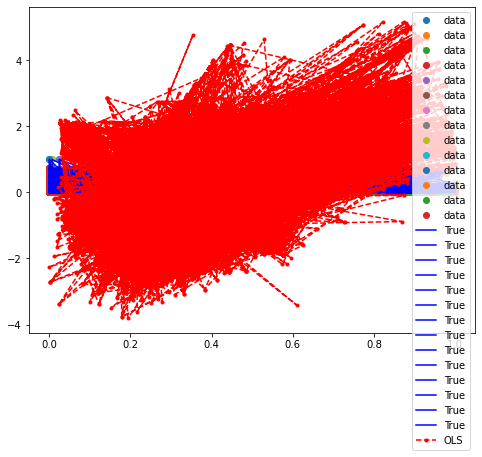

In [139]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, y, "o", label="data")
ax.plot(X, y, "b-", label="True")
ax.plot(X_train[:, 0], seq_regressor.predict(X_train), "r--.", label="OLS")
ax.legend(loc="best")

## Implementing Sequential Gradient Descent using sklearn

In [17]:
from sklearn.linear_model import SGDRegressor
SGD_Regressor = SGDRegressor()
SGD_Regressor.fit(X_train,y_train)
y_p = SGD_Regressor.predict(X_test)
r2_score(y_test,y_p)
#SGD_Regressor.coef_

0.5819916738347011

## Implementing LASSO

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.8)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

##  Calculate Mean Squared Error

In [25]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set',mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set',mse_test)     # use round(mse_train, 2) for round off value

MSE training set 0.03415011031215773
MSE test set 0.03459162272981166


## Calculating Coefficient Estimate

In [28]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = df_c.columns # for getting column names
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

                            Columns  Coefficient Estimate
0              wtd_mean_atomic_mass                  -0.0
1           wtd_entropy_atomic_mass                   0.0
2               wtd_std_atomic_mass                   0.0
3                      wtd_mean_fie                   0.0
4           wtd_range_atomic_radius                  -0.0
5         wtd_mean_ElectronAffinity                   0.0
6      wtd_entropy_ElectronAffinity                   0.0
7          wtd_std_ElectronAffinity                   0.0
8               wtd_mean_FusionHeat                  -0.0
9      wtd_mean_ThermalConductivity                   0.0
10    wtd_gmean_ThermalConductivity                  -0.0
11  wtd_entropy_ThermalConductivity                  -0.0
12                 wtd_mean_Valence                  -0.0
13                  wtd_std_Valence                  -0.0


## Calculating R squared values

In [29]:
print('R squared training set', lasso.score(X_train, y_train))
print('R squared test set', lasso.score(X_test, y_test))

R squared training set 0.0
R squared test set -0.00011261263570228053


Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

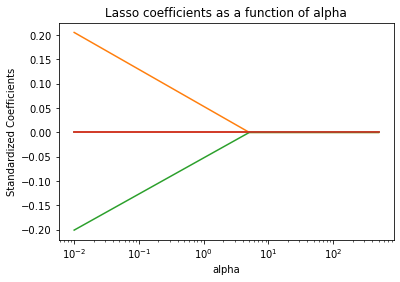

In [149]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

## Comparision of OLS and LASSO

ConversionError: Failed to convert value(s) to axis units: ''

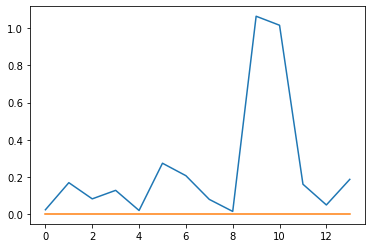

In [33]:
plt.plot(np.abs(res.params))
plt.plot(np.abs(lasso.coef_))
plt.xticks("")
plt.xlabel("Parameters")
plt.legend(["OLS","Lasso"])
plt.show()

## Implementing Ridge

In [153]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0.8)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= df.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


0.011776581310878347
                            Columns  Coefficient Estimate
0              wtd_mean_atomic_mass              0.026792
1             wtd_gmean_atomic_mass              0.187526
2           wtd_entropy_atomic_mass              0.079965
3             wtd_range_atomic_mass              0.121426
4               wtd_std_atomic_mass              0.017190
5                      wtd_mean_fie             -0.270650
6                     wtd_gmean_fie             -0.202336
7                   wtd_entropy_fie              0.077797
8                     wtd_range_fie              0.010853
9                       wtd_std_fie              1.023024
10           wtd_mean_atomic_radius             -0.967284
11          wtd_gmean_atomic_radius              0.149496
12        wtd_entropy_atomic_radius             -0.058187
13          wtd_range_atomic_radius             -0.189819
14            wtd_std_atomic_radius                   NaN
15                 wtd_mean_Density                

Lasso(alpha=0.3)

In [ ]:
## Elastic Net

In [158]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = df.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 0.03393078881705634


,Columns,Coefficient Estimate
0,wtd_mean_atomic_mass,-0.0
1,wtd_gmean_atomic_mass,0.0
2,wtd_entropy_atomic_mass,0.0
3,wtd_range_atomic_mass,0.0
4,wtd_std_atomic_mass,-0.0
5,wtd_mean_fie,0.0
6,wtd_gmean_fie,0.0
7,wtd_entropy_fie,0.0
8,wtd_range_fie,-0.0
9,wtd_std_fie,0.0


In [80]:
# Ratuls Function

def check(x):
    return np.logical_and(np.array(x)< 0.7 , np.array(x)>-0.7)
#def sel(df):
    

In [87]:
df[df.apply(check)]

,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,wtd_std_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.621979,0.262848,NaN,NaN,NaN,NaN,NaN,NaN,0.437059
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.619735,0.567706,NaN,NaN,NaN,NaN,NaN,NaN,0.468606
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.619095,0.250477,NaN,NaN,NaN,NaN,NaN,NaN,0.444697
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.620535,0.257045,NaN,NaN,NaN,NaN,NaN,NaN,0.440952
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.624878,0.272820,NaN,NaN,NaN,NaN,NaN,NaN,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.634332,NaN,NaN,NaN,NaN,NaN,NaN,0.496904
21259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212959
21260,NaN,NaN,0.530198,NaN,NaN,NaN,NaN,0.542120,NaN,NaN,...,NaN,NaN,0.559446,NaN,NaN,NaN,NaN,0.450561,NaN,0.400000
21261,NaN,NaN,0.640883,NaN,NaN,NaN,NaN,0.648876,NaN,NaN,...,NaN,NaN,0.659671,NaN,NaN,NaN,NaN,0.577601,NaN,0.462493


In [81]:
l = df.apply(check)

In [84]:
df[df.apply(check)]

,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,wtd_std_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.621979,0.262848,NaN,NaN,NaN,NaN,NaN,NaN,0.437059
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.619735,0.567706,NaN,NaN,NaN,NaN,NaN,NaN,0.468606
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.619095,0.250477,NaN,NaN,NaN,NaN,NaN,NaN,0.444697
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.620535,0.257045,NaN,NaN,NaN,NaN,NaN,NaN,0.440952
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.624878,0.272820,NaN,NaN,NaN,NaN,NaN,NaN,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.634332,NaN,NaN,NaN,NaN,NaN,NaN,0.496904
21259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212959
21260,NaN,NaN,0.530198,NaN,NaN,NaN,NaN,0.542120,NaN,NaN,...,NaN,NaN,0.559446,NaN,NaN,NaN,NaN,0.450561,NaN,0.400000
21261,NaN,NaN,0.640883,NaN,NaN,NaN,NaN,0.648876,NaN,NaN,...,NaN,NaN,0.659671,NaN,NaN,NaN,NaN,0.577601,NaN,0.462493


In [85]:
df.shape

(21263, 40)

In [ ]:
X = np.array(df[])


y = np.array(df[])